# Data Augmentation Examinations

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

## original pictures

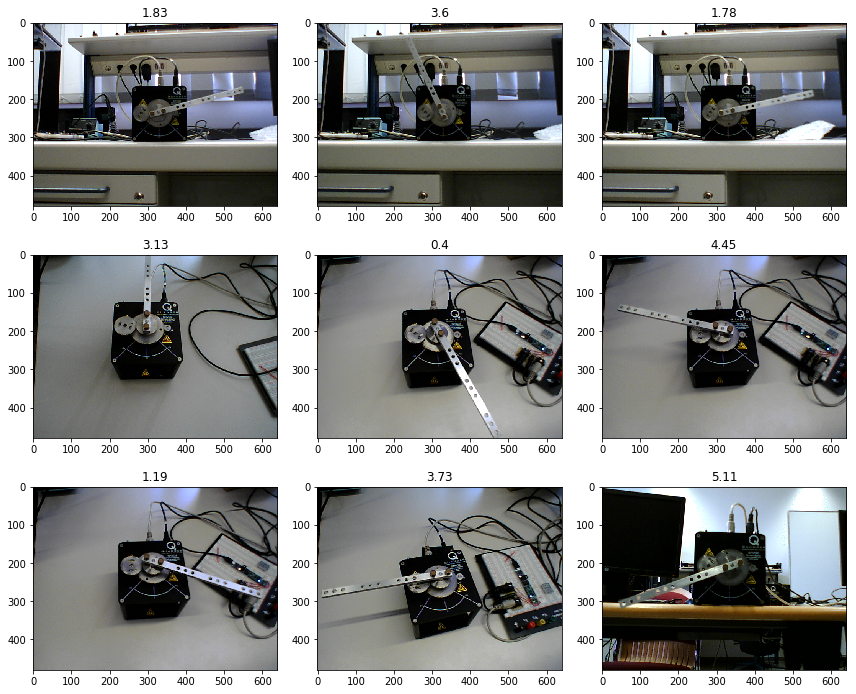

In [2]:
traindf=pd.read_csv("./labels.csv",dtype={'id': str, 'label': np.float32})

#Visualizing some Examples
IMG_PATH = "images/"
fig = plt.figure(figsize=(12,10))
for i in range (1, 10):
    a = fig.add_subplot(3, 3, i)
    imgplot = plt.imshow(mpimg.imread(IMG_PATH+traindf.iloc[(i*5000)-1]['id']), cmap='gray', vmin=0, vmax=1)
    a.set_title(traindf.iloc[(i*5000)-1]['label']) 
    plt.tight_layout()

## Augmentation Templates

Found 55479 images.
(9, 480, 640, 3)


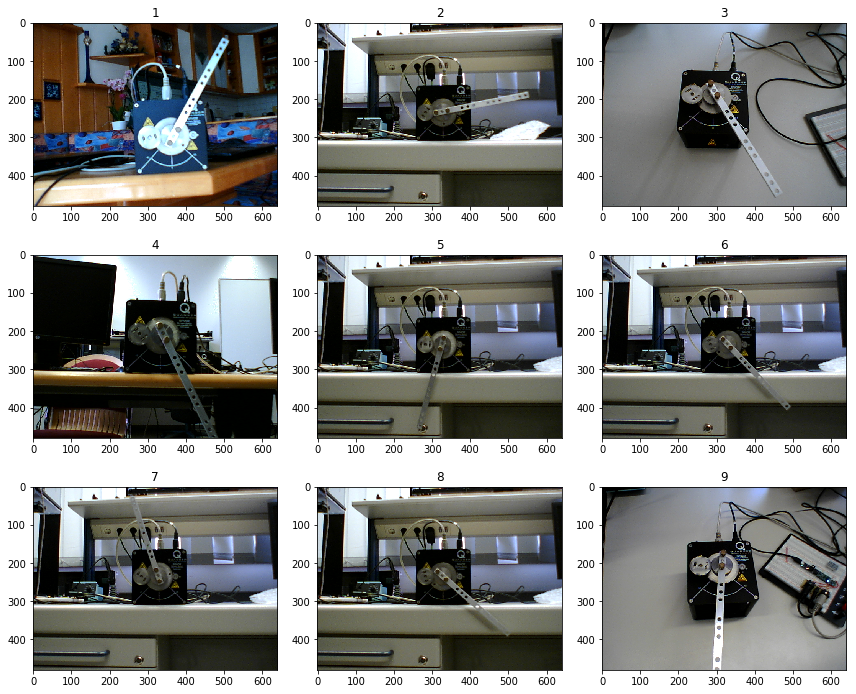

In [3]:
#Option 1: with saving
aug_name = "no_augmentation"
datagen = keras.preprocessing.image.ImageDataGenerator()
train_generator = datagen.flow_from_dataframe(dataframe=traindf,
                                                    directory='./images/',
                                                    x_col="id",
                                                    y_col="label",
                                                    batch_size=9,
                                                    shuffle=True,
                                                    class_mode="other",
                                                    target_size=(480,640))
for X_batch, y_batch in train_generator:
    for i in range(9):
        image = (X_batch[i].astype('uint8'))
        plt.imsave("./augmentations/{}_{}.png".format(i, aug_name), image, cmap='gray', vmin = 0, vmax = 255)
    break

fig = plt.figure(figsize=(12,10))
for i in range(1, 10):
    a = fig.add_subplot(3, 3, i)
    imgplot = plt.imshow(mpimg.imread("augmentations/{}_{}.png".format(i-1, aug_name)))
    a.set_title("{}".format(i))
    plt.tight_layout()

In [ ]:
#Option 2: without saving
datagen = keras.preprocessing.image.ImageDataGenerator()
train_generator = datagen.flow_from_dataframe(dataframe=traindf,
                                                    directory='./images/',
                                                    x_col="id",
                                                    y_col="label",
                                                    batch_size=9,
                                                    shuffle=True,
                                                    class_mode="other",
                                                    target_size=(480,640))
fig = plt.figure(figsize=(12,10))
for X_batch, y_batch in train_generator:
    for i in range(1, 10):
        image = (X_batch[i-1].astype('uint8'))
        a = fig.add_subplot(3, 3, i)
        imgplot = plt.imshow(image)
        a.set_title("{}".format(i))
        plt.tight_layout()
    break